<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/dz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание на тему "Центральная предельная теорема."

<pre>
ФИО: Никифоров Владимир
</pre>

Как применить законы статистики к данным ? 
Сколько элементов сумм использовано в коде?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy.linalg as la
import math
import seaborn as sns

%matplotlib inline

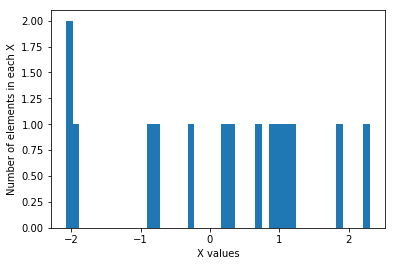

In [2]:
# на графике 15 единичных столбцов (12 с высотой до 1 и тройной столбец == три единичных столбца)
number_of_sums = 15 #- найти количество
number_of_randoms = 10
X1 = np.zeros((number_of_sums, 1))
for i in range(number_of_sums):
  X1[i,0] = np.sum(np.random.rand(number_of_randoms,1)) - np.sum(np.random.rand(number_of_randoms,1))
plt.hist(X1, 45)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

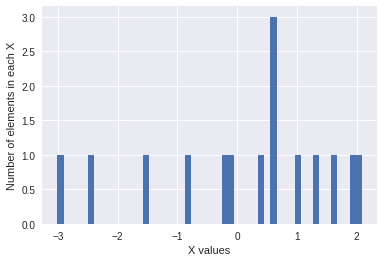

In [ ]:
# С учетом различия random_state при генерации случайной выборки полученный график похож на требуемый, т.к. также имеет 15 единичных значений

# Матрица ковариаций

Чему равна матрица ковариаций для графика?

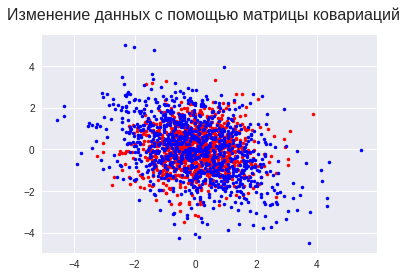

In [ ]:
# итак, необходимо подобрать значения ковариационной матрицы для такого графика.
# подбор значений для трансформации нормального распределения (красная выборка) будем осуществлять путем перебора.

In [3]:
n = 1000

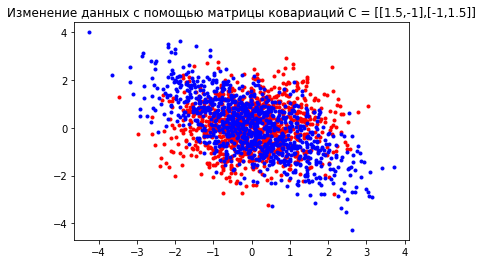

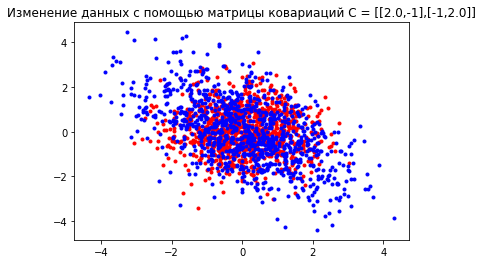

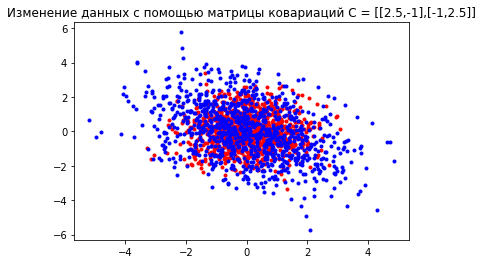

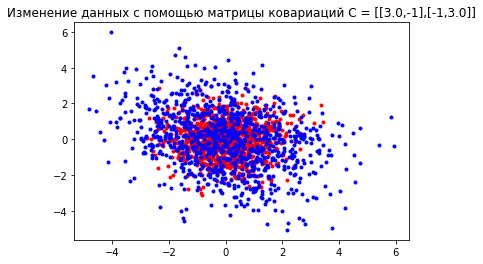

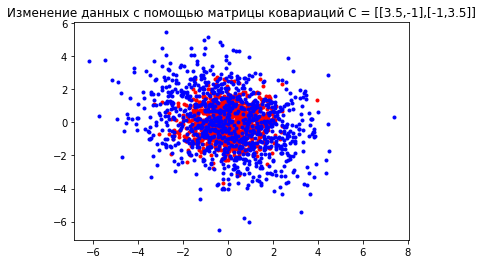

In [4]:
for i in range(-8,8):
    C = [[i/2,-1],[-1,i/2]] # найти!
    try:
        A = la.cholesky(C)
    except:
        continue
    X = np.random.randn(n,2)
    Y = np.dot(A,X.T)

    plt.title(f'Изменение данных с помощью матрицы ковариаций C = [[{i/2},-1],[-1,{i/2}]]', fontsize=12)  
    plt.plot(X[:,0], X[:,1], 'r.')
    plt.plot(Y[0,:], Y[1,:], 'b.');
    plt.show()

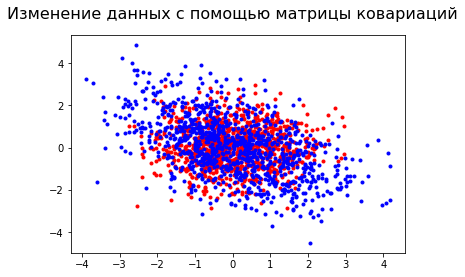

In [29]:
# По границам графика, наклону и дисперсии распределения выбрана ковариационная матрица: C = [[2,-1],[-1,2]]

# Разброс данных 2 способами: теоритически и практически

Построить преобразование с помощью вычисленной выше матрицей

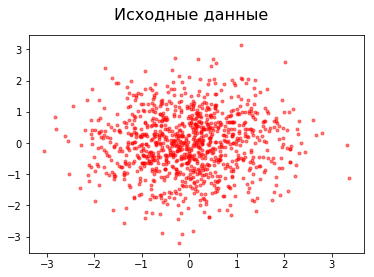

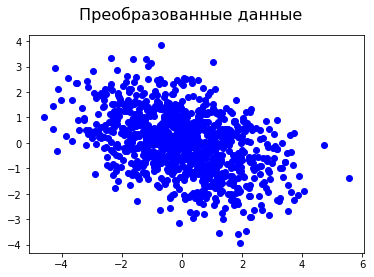

In [5]:
mu, sigma = 0, 1 # mean and standard deviation
# x = np.random.normal(mu, sigma, 100)
x = np.matrix(np.random.normal(0, 1, size=(1000, 2)))
c = [[2,-1],[-1,2]]
a = np.linalg.cholesky(c)
y = x * a
plt.suptitle('Исходные данные', fontsize=16) 
plt.plot(x[:, 0], x[:, 1], linestyle='None', color="red", marker=".", alpha=0.5) 
plt.show()
plt.suptitle('Преобразованные данные', fontsize=16) 
plt.plot(y[:, 0], y[:, 1], linestyle='None', color="blue", marker="o", alpha=1)
plt.show()

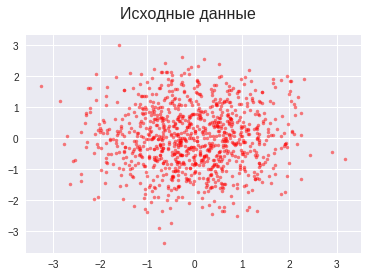

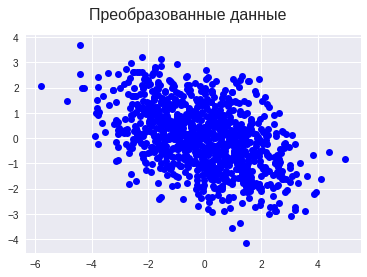

In [ ]:
# Полученные с помощью ковариационной матрицы C = [[2,-1],[-1,2]] графики похожи на требуемые ниже:

Посчитать угол наклона полученного распределения (визуально) в радианах и посчитать разброс данных теоритически и практически

In [6]:
theta = (135)*3.14/180
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp = y*u
var_empirical = np.var(yp)
var_theoretical = u.T*c*u
print('генерация данных: ', var_empirical)
print('теоретический подсчет: ', var_theoretical)

генерация данных:  2.7015278518783044
теоретический подсчет:  [[2.99999715]]


При  большом количестве данных эти показатели должны быть равны. Достаточно ли мы данных сгенерировали?

In [7]:
# Попробуем при бОльшем количестве сгенерированных данных
x = np.matrix(np.random.normal(0, 1, size=(10000000, 2)))
c = [[2,-1],[-1,2]]
a = np.linalg.cholesky(c)
y = x * a

theta = (135)*3.14/180
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp = y*u
var_empirical = np.var(yp)
var_theoretical = u.T*c*u
print('генерация данных: ', var_empirical)
print('теоретический подсчет: ', var_theoretical)

генерация данных:  2.866932114152664
теоретический подсчет:  [[2.99999715]]


Даже при значительно бОльшей выборке теоретический и практический разброс данных не совпадает.

Посчитать как меняется вариация в зависимости от выбора собственного вектора

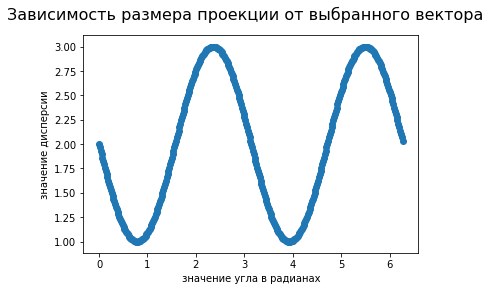

In [8]:
x = np.matrix(np.random.normal(0, 1, size=(1000, 2)))
c = [[2,-1],[-1,2]]
a = np.linalg.cholesky(c)
y = x * a

degrees360 = [2*math.pi/360*i for i in range(360)]
variances = []
for i in degrees360:
    theta = i
    u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
    yp = y*u
    var_empirical = np.var(yp)
    var_theoretical = np.transpose(u)*c*u
    variances.append(var_theoretical)

plt.suptitle('Зависимость размера проекции от выбранного вектора', fontsize=16)    
plt.xlabel('значение угла в радианах')
plt.ylabel('значение дисперсии')
plt.scatter(degrees360, variances)
plt.show()

# Работа с данными

Загрузить таблицу. 

In [9]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')), header=0)

In [10]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Построить корелляцию для всех типов авокадо (их там три). Построить графики histograms и плотность распределения (смотрим примеры из лекций).

In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', '4225', '4770']])
df_norm = pd.DataFrame(np_scaled, columns=['4046', '4225', '4770'])
print(df_norm[:5])

       4046      4225      4770
0 -0.999909 -0.994680 -0.999962
1 -0.999941 -0.995639 -0.999954
2 -0.999930 -0.989336 -0.999898
3 -0.999900 -0.992968 -0.999943
4 -0.999917 -0.995717 -0.999940


Как пример, корелляциям между 'Total Volume' и 'Total Bags'

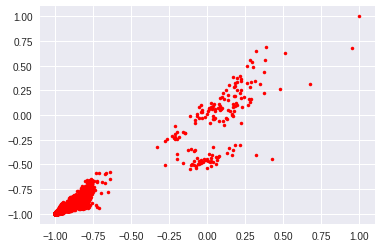

Корреляция для типов авокадо

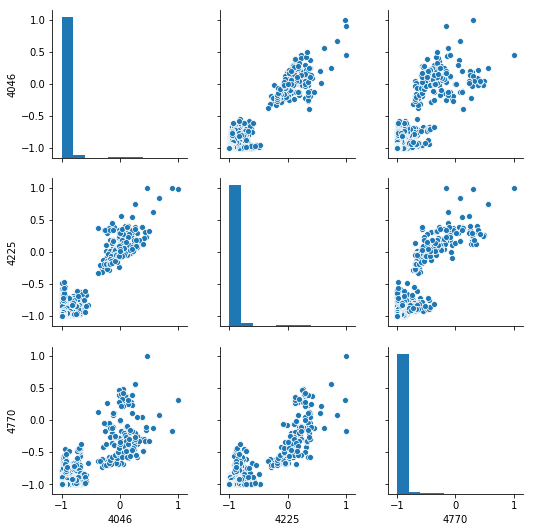

In [12]:
sns.pairplot(data=df_norm,palette='hot');

Посчитать матрицу ковариаций. Как из нее получить собственные вектора и собственные числа?

In [13]:
# матрица ковариаций получается методом cov()
df_norm.corr()

,4046,4225,4770
4046,1.000000,0.926110,0.833389
4225,0.926110,1.000000,0.887855
4770,0.833389,0.887855,1.000000


In [14]:
# сохраним матрицу ковариаций в переменную
cm = df_norm.corr()

In [15]:
# и с помощью линейной алгебры получим значения собственных векторов для данной матрицы ковариации
w,v = la.eig(cm)
print(w)
print(v)

[2.76544627 0.17115766 0.06339607]
[[-0.57634639 -0.6019748   0.55267638]
 [-0.58783414 -0.16442044 -0.79209654]
 [-0.56769345  0.78140403  0.25909821]]


# Поиск собственного вектора

         4046     4225
4046  1.00000  0.92611
4225  0.92611  1.00000
1.9261099558992305 [0.70710678 0.70710678]


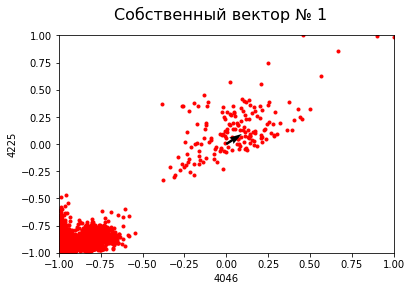

0.07389004410076949 [-0.70710678  0.70710678]


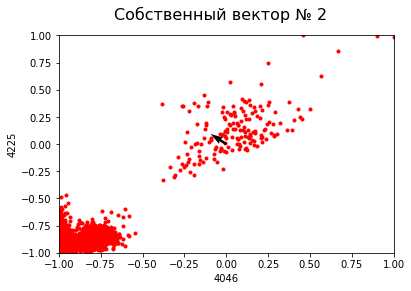

In [16]:
# Получим собственные вектора для матрицы ковариации типов авокадо 4046 и 4225
cm = df_norm[['4046','4225']].corr()
print(cm)
w,v = la.eig(cm)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(df_norm['4046'], df_norm['4225'], 'r.', zorder=1)
    plt.axis([-1,1,-1,1])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', zorder=2)
    plt.xlabel('4046')
    plt.ylabel('4225')
    plt.show()

          4046      4770
4046  1.000000  0.833389
4770  0.833389  1.000000
1.8333891041719104 [0.70710678 0.70710678]


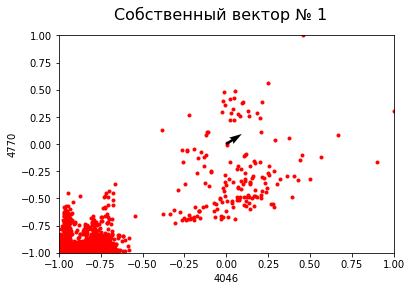

0.16661089582808963 [-0.70710678  0.70710678]


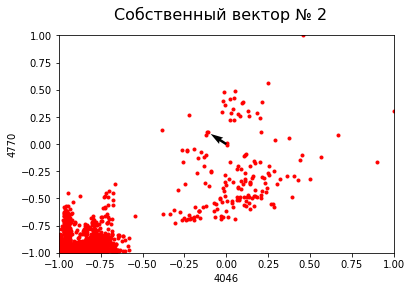

In [17]:
# Получим собственные вектора для матрицы ковариации типов авокадо 4046 и 4770
cm = df_norm[['4046','4770']].corr()
print(cm)
w,v = la.eig(cm)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(df_norm['4046'], df_norm['4770'], 'r.', zorder=1)
    plt.axis([-1,1,-1,1])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', zorder=2)
    plt.xlabel('4046')
    plt.ylabel('4770')
    plt.show()

          4770      4225
4770  1.000000  0.887855
4225  0.887855  1.000000
1.8878549976059669 [0.70710678 0.70710678]


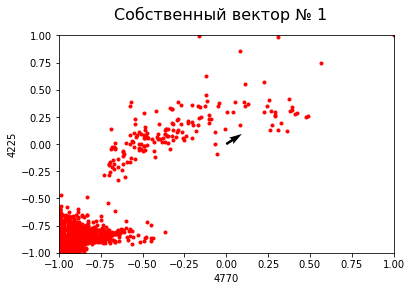

0.1121450023940328 [-0.70710678  0.70710678]


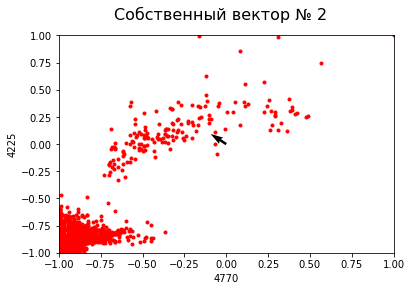

In [18]:
# Получим собственные вектора для матрицы ковариации типов авокадо 4770 и 4225
cm = df_norm[['4770','4225']].corr()
print(cm)
w,v = la.eig(cm)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(df_norm['4770'], df_norm['4225'], 'r.', zorder=1)
    plt.axis([-1,1,-1,1])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', zorder=2)
    plt.xlabel('4770')
    plt.ylabel('4225')
    plt.show()

# Линейное преобразование значений (проекция на ось).

На какую прямую проецируем?

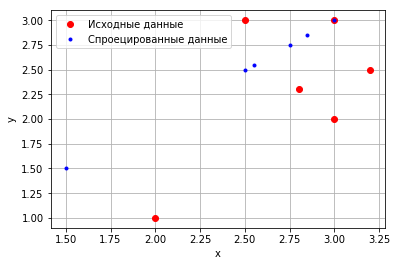

In [19]:
Xc = np.array([[2,1],[3,2],[3,3],[2.5,3],[2.8,2.3],[3.2,2.5]])
# проецирование на какую прямую
P = [[0.5,0.5],[0.5,0.5]]
Xp = np.dot(Xc,P)

plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

# Теория вероятности

Напишите код для моделирования 100 подбрасываний игрального кубика. Начертите диаграму histogram. 

In [20]:
x = []
for i in range(100):
    x.append(np.random.randint( 1,7))

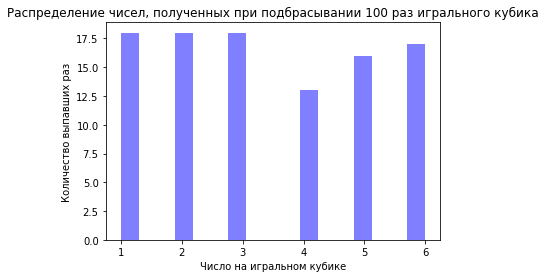

In [22]:
plt.hist(x, bins=17, facecolor='blue', alpha=0.5)
plt.xlabel('Число на игральном кубике')
plt.ylabel('Количество выпавших раз')
plt.title('Распределение чисел, полученных при подбрасывании 100 раз игрального кубика')
plt.show()

In [24]:
data_binom = sts.binom.rvs(n=10,p=1/6,size=100)

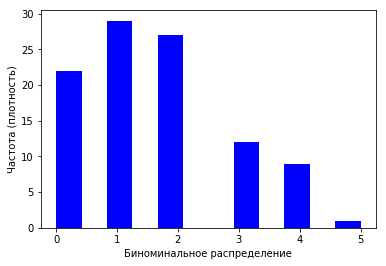

In [27]:
import warnings
warnings.filterwarnings("ignore")

ax = sns.distplot(data_binom,
                  kde=False,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Биноминальное распределение', ylabel='Частота (плотность)');